## Table of Contents

- [1-Packages](#1)
- [2-Load the Data and Split the Data into Train/Test Sets](#2)
- [ Layers in TF Keras](#3)
- [3 - The Sequential API](#4)
- [4- Create the Sequential Model](#5)
- [5 - HappyModel](#6)
- [6 - Train the Model](#7)
- [7 - Evaluate the Model](#8)

<a name='1'></a>
## 1- Packages

In [18]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image

import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

import warnings
warnings.simplefilter(action="ignore")

%matplotlib inline
np.random.seed(1)

<a name='2'></a>
##  2- Load the Data and Split the Data into Train/Test Sets

Task will be to build a ConvNet(CNN) that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [19]:
import pandas as pd
import h5py
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [20]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig =  load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

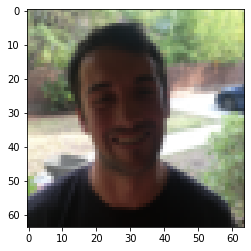

In [21]:
index = 500
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

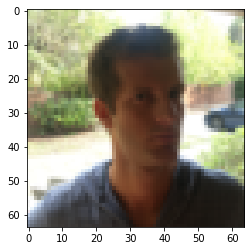

In [22]:
index = 333
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

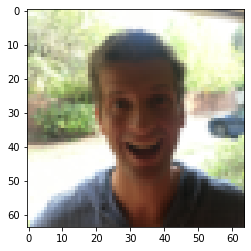

In [23]:
index = 125
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()


##  Layers in TF Keras 

In TF Keras, you don't have to write code directly to create layers. Rather, TF Keras has pre-defined layers you can use. 

When you create a layer in TF Keras, you are creating a function that takes some input and transforms it into an output you can reuse later.

<a name='3'></a>
## 3 - The Sequential API

Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and training. 

create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As you'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook you'll spend some time building with a more flexible, powerful alternative: the Functional API. 
 

<a name='4'></a>
### 4 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. 

You can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, you'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like you will do in the next assignment.

<a name='5'></a>
### 5 - HappyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
  
 **tfl** is the shorthand for **tensorflow.keras.layers**

In [24]:
# GRADED FUNCTION: happyModel

def happyModel():
    
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D((3,3),input_shape=(64,64,3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(32,(7,7)),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),
            ## ReLU
            tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPool2D(),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1,activation='sigmoid'),
            
        ])
    
    return model

In [25]:
happy_model = happyModel()

In [26]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [27]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

<a name='6'></a>
### 6 - Train the Model

`.fit()` is used to train the model.\
 No need for mini-batching, saving, or complex backpropagation computations. That's all been done for you, as you're using a TensorFlow dataset with the batches specified already. You do have the option to specify epoch number or minibatch size if you like (for example, in the case of an un-batched dataset).

In [31]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 72ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 2/10
38/38 [==============================] - 3s 77ms/step - loss: 0.1234 - accuracy: 0.9500
Epoch 3/10
38/38 [==============================] - 4s 103ms/step - loss: 0.1381 - accuracy: 0.9550
Epoch 4/10
38/38 [==============================] - 4s 101ms/step - loss: 0.1616 - accuracy: 0.9533
Epoch 5/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0958 - accuracy: 0.9600
Epoch 6/10
38/38 [==============================] - 3s 88ms/step - loss: 0.0675 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0659 - accuracy: 0.9767
Epoch 8/10
38/38 [==============================] - 3s 88ms/step - loss: 0.3542 - accuracy: 0.9033
Epoch 9/10
38/38 [==============================] - 3s 89ms/step - loss: 0.1970 - accuracy: 0.9417
Epoch 10/10
38/38 [==============================] - 3s 89ms/step - loss: 0.0520 - accuracy: 0.9800


<a name='7'></a>
### 7 - Train and Evaluate the Model

  .evaluate() is used to evaluate against your test set.\
  This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the binary_crossentropy and the accuracy respectively.

In [32]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 24ms/step - loss: 0.1213 - accuracy: 0.9667


[0.12126946449279785, 0.9666666388511658]